<center><h1>Gunadi_Eben_HW4</h1></center>
<br>
<br>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [87]:
import pandas as pd
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

Get the AReM Data Set

In [2]:
bending1_dataset1_filepath = '../data/AReM/bending1/dataset1.csv'
bending1_dataset2_filepath = '../data/AReM/bending1/dataset2.csv'
bending1_dataset3_filepath = '../data/AReM/bending1/dataset3.csv'
bending1_dataset4_filepath = '../data/AReM/bending1/dataset4.csv'
bending1_dataset5_filepath = '../data/AReM/bending1/dataset5.csv'
bending1_dataset6_filepath = '../data/AReM/bending1/dataset6.csv'
bending1_dataset7_filepath = '../data/AReM/bending1/dataset7.csv'

bending2_dataset1_filepath = '../data/AReM/bending2/dataset1.csv'
bending2_dataset2_filepath = '../data/AReM/bending2/dataset2.csv'
bending2_dataset3_filepath = '../data/AReM/bending2/dataset3.csv'
bending2_dataset4_filepath = '../data/AReM/bending2/dataset4.csv'
bending2_dataset5_filepath = '../data/AReM/bending2/dataset5.csv'
bending2_dataset6_filepath = '../data/AReM/bending2/dataset6.csv'

cycling_dataset1_filepath = '../data/AReM/cycling/dataset1.csv'
cycling_dataset2_filepath = '../data/AReM/cycling/dataset2.csv'
cycling_dataset3_filepath = '../data/AReM/cycling/dataset3.csv'
cycling_dataset4_filepath = '../data/AReM/cycling/dataset4.csv'
cycling_dataset5_filepath = '../data/AReM/cycling/dataset5.csv'
cycling_dataset6_filepath = '../data/AReM/cycling/dataset6.csv'
cycling_dataset7_filepath = '../data/AReM/cycling/dataset7.csv'
cycling_dataset8_filepath = '../data/AReM/cycling/dataset8.csv'
cycling_dataset9_filepath = '../data/AReM/cycling/dataset9.csv'
cycling_dataset10_filepath = '../data/AReM/cycling/dataset10.csv'
cycling_dataset11_filepath = '../data/AReM/cycling/dataset11.csv'
cycling_dataset12_filepath = '../data/AReM/cycling/dataset12.csv'
cycling_dataset13_filepath = '../data/AReM/cycling/dataset13.csv'
cycling_dataset14_filepath = '../data/AReM/cycling/dataset14.csv'
cycling_dataset15_filepath = '../data/AReM/cycling/dataset15.csv'

lying_dataset1_filepath = '../data/AReM/lying/dataset1.csv'
lying_dataset2_filepath = '../data/AReM/lying/dataset2.csv'
lying_dataset3_filepath = '../data/AReM/lying/dataset3.csv'
lying_dataset4_filepath = '../data/AReM/lying/dataset4.csv'
lying_dataset5_filepath = '../data/AReM/lying/dataset5.csv'
lying_dataset6_filepath = '../data/AReM/lying/dataset6.csv'
lying_dataset7_filepath = '../data/AReM/lying/dataset7.csv'
lying_dataset8_filepath = '../data/AReM/lying/dataset8.csv'
lying_dataset9_filepath = '../data/AReM/lying/dataset9.csv'
lying_dataset10_filepath = '../data/AReM/lying/dataset10.csv'
lying_dataset11_filepath = '../data/AReM/lying/dataset11.csv'
lying_dataset12_filepath = '../data/AReM/lying/dataset12.csv'
lying_dataset13_filepath = '../data/AReM/lying/dataset13.csv'
lying_dataset14_filepath = '../data/AReM/lying/dataset14.csv'
lying_dataset15_filepath = '../data/AReM/lying/dataset15.csv'

sitting_dataset1_filepath = '../data/AReM/sitting/dataset1.csv'
sitting_dataset2_filepath = '../data/AReM/sitting/dataset2.csv'
sitting_dataset3_filepath = '../data/AReM/sitting/dataset3.csv'
sitting_dataset4_filepath = '../data/AReM/sitting/dataset4.csv'
sitting_dataset5_filepath = '../data/AReM/sitting/dataset5.csv'
sitting_dataset6_filepath = '../data/AReM/sitting/dataset6.csv'
sitting_dataset7_filepath = '../data/AReM/sitting/dataset7.csv'
sitting_dataset8_filepath = '../data/AReM/sitting/dataset8.csv'
sitting_dataset9_filepath = '../data/AReM/sitting/dataset9.csv'
sitting_dataset10_filepath = '../data/AReM/sitting/dataset10.csv'
sitting_dataset11_filepath = '../data/AReM/sitting/dataset11.csv'
sitting_dataset12_filepath = '../data/AReM/sitting/dataset12.csv'
sitting_dataset13_filepath = '../data/AReM/sitting/dataset13.csv'
sitting_dataset14_filepath = '../data/AReM/sitting/dataset14.csv'
sitting_dataset15_filepath = '../data/AReM/sitting/dataset15.csv'

standing_dataset1_filepath = '../data/AReM/standing/dataset1.csv'
standing_dataset2_filepath = '../data/AReM/standing/dataset2.csv'
standing_dataset3_filepath = '../data/AReM/standing/dataset3.csv'
standing_dataset4_filepath = '../data/AReM/standing/dataset4.csv'
standing_dataset5_filepath = '../data/AReM/standing/dataset5.csv'
standing_dataset6_filepath = '../data/AReM/standing/dataset6.csv'
standing_dataset7_filepath = '../data/AReM/standing/dataset7.csv'
standing_dataset8_filepath = '../data/AReM/standing/dataset8.csv'
standing_dataset9_filepath = '../data/AReM/standing/dataset9.csv'
standing_dataset10_filepath = '../data/AReM/standing/dataset10.csv'
standing_dataset11_filepath = '../data/AReM/standing/dataset11.csv'
standing_dataset12_filepath = '../data/AReM/standing/dataset12.csv'
standing_dataset13_filepath = '../data/AReM/standing/dataset13.csv'
standing_dataset14_filepath = '../data/AReM/standing/dataset14.csv'
standing_dataset15_filepath = '../data/AReM/standing/dataset15.csv'

walking_dataset1_filepath = '../data/AReM/walking/dataset1.csv'
walking_dataset2_filepath = '../data/AReM/walking/dataset2.csv'
walking_dataset3_filepath = '../data/AReM/walking/dataset3.csv'
walking_dataset4_filepath = '../data/AReM/walking/dataset4.csv'
walking_dataset5_filepath = '../data/AReM/walking/dataset5.csv'
walking_dataset6_filepath = '../data/AReM/walking/dataset6.csv'
walking_dataset7_filepath = '../data/AReM/walking/dataset7.csv'
walking_dataset8_filepath = '../data/AReM/walking/dataset8.csv'
walking_dataset9_filepath = '../data/AReM/walking/dataset9.csv'
walking_dataset10_filepath = '../data/AReM/walking/dataset10.csv'
walking_dataset11_filepath = '../data/AReM/walking/dataset11.csv'
walking_dataset12_filepath = '../data/AReM/walking/dataset12.csv'
walking_dataset13_filepath = '../data/AReM/walking/dataset13.csv'
walking_dataset14_filepath = '../data/AReM/walking/dataset14.csv'
walking_dataset15_filepath = '../data/AReM/walking/dataset15.csv'



In [3]:
bending1_dataset1_df = pd.read_csv(bending1_dataset1_filepath, delimiter=',', encoding='utf-8')
bending1_dataset2_df = pd.read_csv(bending1_dataset2_filepath, delimiter=',', encoding='utf-8')
bending1_dataset3_df = pd.read_csv(bending1_dataset3_filepath, delimiter=',', encoding='utf-8')
bending1_dataset4_df = pd.read_csv(bending1_dataset4_filepath, delimiter=',', encoding='utf-8')
bending1_dataset5_df = pd.read_csv(bending1_dataset5_filepath, delimiter=',', encoding='utf-8')
bending1_dataset6_df = pd.read_csv(bending1_dataset6_filepath, delimiter=',', encoding='utf-8')
bending1_dataset7_df = pd.read_csv(bending1_dataset7_filepath, delimiter=',', encoding='utf-8')

bending2_dataset1_df = pd.read_csv(bending2_dataset1_filepath, delimiter=',', encoding='utf-8')
bending2_dataset2_df = pd.read_csv(bending2_dataset2_filepath, delimiter=',', encoding='utf-8')
bending2_dataset3_df = pd.read_csv(bending2_dataset3_filepath, delimiter=',', encoding='utf-8')
bending2_dataset4_df = pd.read_csv(bending2_dataset4_filepath, delimiter=',', encoding='utf-8')
bending2_dataset5_df = pd.read_csv(bending2_dataset5_filepath, delimiter=',', encoding='utf-8')
bending2_dataset6_df = pd.read_csv(bending2_dataset6_filepath, delimiter=',', encoding='utf-8')

cycling_dataset1_df = pd.read_csv(cycling_dataset1_filepath, delimiter=',', encoding='utf-8')
cycling_dataset2_df = pd.read_csv(cycling_dataset2_filepath, delimiter=',', encoding='utf-8')
cycling_dataset3_df = pd.read_csv(cycling_dataset3_filepath, delimiter=',', encoding='utf-8')
cycling_dataset4_df = pd.read_csv(cycling_dataset4_filepath, delimiter=',', encoding='utf-8')
cycling_dataset5_df = pd.read_csv(cycling_dataset5_filepath, delimiter=',', encoding='utf-8')
cycling_dataset6_df = pd.read_csv(cycling_dataset6_filepath, delimiter=',', encoding='utf-8')
cycling_dataset7_df = pd.read_csv(cycling_dataset7_filepath, delimiter=',', encoding='utf-8')
cycling_dataset8_df = pd.read_csv(cycling_dataset8_filepath, delimiter=',', encoding='utf-8')
cycling_dataset9_df = pd.read_csv(cycling_dataset9_filepath, delimiter=',', encoding='utf-8')
cycling_dataset10_df = pd.read_csv(cycling_dataset10_filepath, delimiter=',', encoding='utf-8')
cycling_dataset11_df = pd.read_csv(cycling_dataset11_filepath, delimiter=',', encoding='utf-8')
cycling_dataset12_df = pd.read_csv(cycling_dataset12_filepath, delimiter=',', encoding='utf-8')
cycling_dataset13_df = pd.read_csv(cycling_dataset13_filepath, delimiter=',', encoding='utf-8')
cycling_dataset14_df = pd.read_csv(cycling_dataset14_filepath, delimiter=',', encoding='utf-8')
cycling_dataset15_df = pd.read_csv(cycling_dataset15_filepath, delimiter=',', encoding='utf-8')

lying_dataset1_df = pd.read_csv(lying_dataset1_filepath, delimiter=',', encoding='utf-8')
lying_dataset2_df = pd.read_csv(lying_dataset2_filepath, delimiter=',', encoding='utf-8')
lying_dataset3_df = pd.read_csv(lying_dataset3_filepath, delimiter=',', encoding='utf-8')
lying_dataset4_df = pd.read_csv(lying_dataset4_filepath, delimiter=',', encoding='utf-8')
lying_dataset5_df = pd.read_csv(lying_dataset5_filepath, delimiter=',', encoding='utf-8')
lying_dataset6_df = pd.read_csv(lying_dataset6_filepath, delimiter=',', encoding='utf-8')
lying_dataset7_df = pd.read_csv(lying_dataset7_filepath, delimiter=',', encoding='utf-8')
lying_dataset8_df = pd.read_csv(lying_dataset8_filepath, delimiter=',', encoding='utf-8')
lying_dataset9_df = pd.read_csv(lying_dataset9_filepath, delimiter=',', encoding='utf-8')
lying_dataset10_df = pd.read_csv(lying_dataset10_filepath, delimiter=',', encoding='utf-8')
lying_dataset11_df = pd.read_csv(lying_dataset11_filepath, delimiter=',', encoding='utf-8')
lying_dataset12_df = pd.read_csv(lying_dataset12_filepath, delimiter=',', encoding='utf-8')
lying_dataset13_df = pd.read_csv(lying_dataset13_filepath, delimiter=',', encoding='utf-8')
lying_dataset14_df = pd.read_csv(lying_dataset14_filepath, delimiter=',', encoding='utf-8')
lying_dataset15_df = pd.read_csv(lying_dataset15_filepath, delimiter=',', encoding='utf-8')

sitting_dataset1_df = pd.read_csv(sitting_dataset1_filepath, delimiter=',', encoding='utf-8')
sitting_dataset2_df = pd.read_csv(sitting_dataset2_filepath, delimiter=',', encoding='utf-8')
sitting_dataset3_df = pd.read_csv(sitting_dataset3_filepath, delimiter=',', encoding='utf-8')
sitting_dataset4_df = pd.read_csv(sitting_dataset4_filepath, delimiter=',', encoding='utf-8')
sitting_dataset5_df = pd.read_csv(sitting_dataset5_filepath, delimiter=',', encoding='utf-8')
sitting_dataset6_df = pd.read_csv(sitting_dataset6_filepath, delimiter=',', encoding='utf-8')
sitting_dataset7_df = pd.read_csv(sitting_dataset7_filepath, delimiter=',', encoding='utf-8')
sitting_dataset8_df = pd.read_csv(sitting_dataset8_filepath, delimiter=',', encoding='utf-8')
sitting_dataset9_df = pd.read_csv(sitting_dataset9_filepath, delimiter=',', encoding='utf-8')
sitting_dataset10_df = pd.read_csv(sitting_dataset10_filepath, delimiter=',', encoding='utf-8')
sitting_dataset11_df = pd.read_csv(sitting_dataset11_filepath, delimiter=',', encoding='utf-8')
sitting_dataset12_df = pd.read_csv(sitting_dataset12_filepath, delimiter=',', encoding='utf-8')
sitting_dataset13_df = pd.read_csv(sitting_dataset13_filepath, delimiter=',', encoding='utf-8')
sitting_dataset14_df = pd.read_csv(sitting_dataset14_filepath, delimiter=',', encoding='utf-8')
sitting_dataset15_df = pd.read_csv(sitting_dataset15_filepath, delimiter=',', encoding='utf-8')

standing_dataset1_df = pd.read_csv(standing_dataset1_filepath, delimiter=',', encoding='utf-8')
standing_dataset2_df = pd.read_csv(standing_dataset2_filepath, delimiter=',', encoding='utf-8')
standing_dataset3_df = pd.read_csv(standing_dataset3_filepath, delimiter=',', encoding='utf-8')
standing_dataset4_df = pd.read_csv(standing_dataset4_filepath, delimiter=',', encoding='utf-8')
standing_dataset5_df = pd.read_csv(standing_dataset5_filepath, delimiter=',', encoding='utf-8')
standing_dataset6_df = pd.read_csv(standing_dataset6_filepath, delimiter=',', encoding='utf-8')
standing_dataset7_df = pd.read_csv(standing_dataset7_filepath, delimiter=',', encoding='utf-8')
standing_dataset8_df = pd.read_csv(standing_dataset8_filepath, delimiter=',', encoding='utf-8')
standing_dataset9_df = pd.read_csv(standing_dataset9_filepath, delimiter=',', encoding='utf-8')
standing_dataset10_df = pd.read_csv(standing_dataset10_filepath, delimiter=',', encoding='utf-8')
standing_dataset11_df = pd.read_csv(standing_dataset11_filepath, delimiter=',', encoding='utf-8')
standing_dataset12_df = pd.read_csv(standing_dataset12_filepath, delimiter=',', encoding='utf-8')
standing_dataset13_df = pd.read_csv(standing_dataset13_filepath, delimiter=',', encoding='utf-8')
standing_dataset14_df = pd.read_csv(standing_dataset14_filepath, delimiter=',', encoding='utf-8')
standing_dataset15_df = pd.read_csv(standing_dataset15_filepath, delimiter=',', encoding='utf-8')

walking_dataset1_df = pd.read_csv(walking_dataset1_filepath, delimiter=',', encoding='utf-8')
walking_dataset2_df = pd.read_csv(walking_dataset2_filepath, delimiter=',', encoding='utf-8')
walking_dataset3_df = pd.read_csv(walking_dataset3_filepath, delimiter=',', encoding='utf-8')
walking_dataset4_df = pd.read_csv(walking_dataset4_filepath, delimiter=',', encoding='utf-8')
walking_dataset5_df = pd.read_csv(walking_dataset5_filepath, delimiter=',', encoding='utf-8')
walking_dataset6_df = pd.read_csv(walking_dataset6_filepath, delimiter=',', encoding='utf-8')
walking_dataset7_df = pd.read_csv(walking_dataset7_filepath, delimiter=',', encoding='utf-8')
walking_dataset8_df = pd.read_csv(walking_dataset8_filepath, delimiter=',', encoding='utf-8')
walking_dataset9_df = pd.read_csv(walking_dataset9_filepath, delimiter=',', encoding='utf-8')
walking_dataset10_df = pd.read_csv(walking_dataset10_filepath, delimiter=',', encoding='utf-8')
walking_dataset11_df = pd.read_csv(walking_dataset11_filepath, delimiter=',', encoding='utf-8')
walking_dataset12_df = pd.read_csv(walking_dataset12_filepath, delimiter=',', encoding='utf-8')
walking_dataset13_df = pd.read_csv(walking_dataset13_filepath, delimiter=',', encoding='utf-8')
walking_dataset14_df = pd.read_csv(walking_dataset14_filepath, delimiter=',', encoding='utf-8')
walking_dataset15_df = pd.read_csv(walking_dataset15_filepath, delimiter=',', encoding='utf-8')


### (b) Splitting Data

In [4]:
# Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

bending1_train_df = pd.concat([bending1_dataset3_df, bending1_dataset4_df, bending1_dataset5_df, 
                               bending1_dataset6_df, bending1_dataset7_df], ignore_index=True)
bending1_test_df = pd.concat([bending1_dataset1_df, bending1_dataset2_df], ignore_index=True)

bending2_train_df = pd.concat([bending2_dataset3_df, bending2_dataset4_df, bending2_dataset5_df, 
                               bending2_dataset6_df], ignore_index=True)
bending2_test_df = pd.concat([bending2_dataset1_df, bending2_dataset2_df], ignore_index=True)

cycling_train_df = pd.concat([cycling_dataset4_df, cycling_dataset5_df, cycling_dataset6_df, 
                              cycling_dataset7_df, cycling_dataset8_df, cycling_dataset9_df, 
                              cycling_dataset10_df, cycling_dataset11_df, cycling_dataset12_df, 
                              cycling_dataset13_df, cycling_dataset14_df, cycling_dataset15_df], ignore_index=True)
cycling_test_df = pd.concat([cycling_dataset1_df, cycling_dataset2_df, cycling_dataset3_df], ignore_index=True)

lying_train_df = pd.concat([lying_dataset4_df, lying_dataset5_df, lying_dataset6_df, 
                            lying_dataset7_df, lying_dataset8_df, lying_dataset9_df, 
                            lying_dataset10_df, lying_dataset11_df, lying_dataset12_df, 
                            lying_dataset13_df, lying_dataset14_df, lying_dataset15_df], ignore_index=True)
lying_test_df = pd.concat([lying_dataset1_df, lying_dataset2_df, lying_dataset3_df], ignore_index=True)

sitting_train_df = pd.concat([sitting_dataset4_df, sitting_dataset5_df, sitting_dataset6_df, 
                              sitting_dataset7_df, sitting_dataset8_df, sitting_dataset9_df, 
                              sitting_dataset10_df, sitting_dataset11_df, sitting_dataset12_df, 
                              sitting_dataset13_df, sitting_dataset14_df, sitting_dataset15_df], ignore_index=True)
sitting_test_df = pd.concat([sitting_dataset1_df, sitting_dataset2_df, sitting_dataset3_df], ignore_index=True)

standing_train_df = pd.concat([standing_dataset4_df, standing_dataset5_df, standing_dataset6_df, 
                               standing_dataset7_df, standing_dataset8_df, standing_dataset9_df, 
                               standing_dataset10_df, standing_dataset11_df, standing_dataset12_df, 
                               standing_dataset13_df, standing_dataset14_df, standing_dataset15_df], ignore_index=True)
standing_test_df = pd.concat([standing_dataset1_df, standing_dataset2_df, standing_dataset3_df], ignore_index=True)

walking_train_df = pd.concat([walking_dataset4_df, walking_dataset5_df, walking_dataset6_df, 
                              walking_dataset7_df, walking_dataset8_df, walking_dataset9_df, 
                              walking_dataset10_df, walking_dataset11_df, walking_dataset12_df, 
                              walking_dataset13_df, walking_dataset14_df, walking_dataset15_df], ignore_index=True)
walking_test_df = pd.concat([walking_dataset1_df, walking_dataset2_df, walking_dataset3_df], ignore_index=True)

### (c) Feature Extraction

In [5]:
full_df_list = [bending1_dataset1_df, bending1_dataset2_df, bending1_dataset3_df, 
                bending1_dataset4_df, bending1_dataset5_df, bending1_dataset6_df, bending1_dataset7_df,
                
                bending2_dataset1_df, bending2_dataset2_df, bending2_dataset3_df, bending2_dataset4_df, bending2_dataset5_df, bending2_dataset6_df,
                
                cycling_dataset1_df, cycling_dataset2_df, cycling_dataset3_df, cycling_dataset4_df, cycling_dataset5_df, cycling_dataset6_df, cycling_dataset7_df, cycling_dataset8_df, cycling_dataset9_df, cycling_dataset10_df, cycling_dataset11_df, cycling_dataset12_df, cycling_dataset13_df, cycling_dataset14_df, cycling_dataset15_df,
                
                lying_dataset1_df, lying_dataset2_df, lying_dataset3_df, lying_dataset4_df, lying_dataset5_df, lying_dataset6_df, lying_dataset7_df, lying_dataset8_df, lying_dataset9_df, lying_dataset10_df, lying_dataset11_df, lying_dataset12_df, lying_dataset13_df, lying_dataset14_df, lying_dataset15_df,
                
                sitting_dataset1_df, sitting_dataset2_df, sitting_dataset3_df, sitting_dataset4_df, sitting_dataset5_df, sitting_dataset6_df, sitting_dataset7_df, sitting_dataset8_df, sitting_dataset9_df, sitting_dataset10_df, sitting_dataset11_df, sitting_dataset12_df, sitting_dataset13_df, sitting_dataset14_df, sitting_dataset15_df,
                
                standing_dataset1_df, standing_dataset2_df, standing_dataset3_df, standing_dataset4_df, standing_dataset5_df, standing_dataset6_df, standing_dataset7_df, standing_dataset8_df, standing_dataset9_df, standing_dataset10_df, standing_dataset11_df, standing_dataset12_df, standing_dataset13_df, standing_dataset14_df, standing_dataset15_df,
                
                walking_dataset1_df, walking_dataset2_df, walking_dataset3_df, walking_dataset4_df, walking_dataset5_df, walking_dataset6_df, walking_dataset7_df, walking_dataset8_df, walking_dataset9_df, walking_dataset10_df, walking_dataset11_df, walking_dataset12_df, walking_dataset13_df, walking_dataset14_df, walking_dataset15_df]

In [6]:
features_df = pd.DataFrame(columns=['instance', 
                                    'min1', 'max1', 'mean1', 'median1', 'std1', '1st quartile1', '3rd quartile1', 
                                    'min2', 'max2', 'mean2', 'median2', 'std2', '1st quartile2', '3rd quartile2', 
                                    'min3', 'max3', 'mean3', 'median3', 'std3', '1st quartile3', '3rd quartile3', 
                                    'min4', 'max4', 'mean4', 'median4', 'std4', '1st quartile4', '3rd quartile4', 
                                    'min5', 'max5', 'mean5', 'median5', 'std5', '1st quartile5', '3rd quartile5', 
                                    'min6', 'max6', 'mean6', 'median6', 'std6', '1st quartile6', '3rd quartile6'])

instance_counter = 1
for df in full_df_list:
    describe_df = df.describe()

    instance_dict = {  'instance': instance_counter,
                                  
                        'min1': describe_df['avg_rss12']['min'], 'max1': describe_df['avg_rss12']['max'], 'mean1': describe_df['avg_rss12']['mean'], 'median1': describe_df['avg_rss12']['50%'], 'std1': describe_df['avg_rss12']['std'], '1st quartile1': describe_df['avg_rss12']['25%'], '3rd quartile1': describe_df['avg_rss12']['75%'],

                        'min2': describe_df['var_rss12']['min'], 'max2': describe_df['var_rss12']['max'], 'mean2': describe_df['var_rss12']['mean'], 'median2': describe_df['var_rss12']['50%'], 'std2': describe_df['var_rss12']['std'], '1st quartile2': describe_df['var_rss12']['25%'], '3rd quartile2': describe_df['var_rss12']['75%'],

                        'min3': describe_df['avg_rss13']['min'], 'max3': describe_df['avg_rss13']['max'], 'mean3': describe_df['avg_rss13']['mean'], 'median3': describe_df['avg_rss13']['50%'], 'std3': describe_df['avg_rss13']['std'], '1st quartile3': describe_df['avg_rss13']['25%'], '3rd quartile3': describe_df['avg_rss13']['75%'],

                        'min4': describe_df['var_rss13']['min'], 'max4': describe_df['var_rss13']['max'], 'mean4': describe_df['var_rss13']['mean'], 'median4': describe_df['var_rss13']['50%'], 'std4': describe_df['var_rss13']['std'], '1st quartile4': describe_df['var_rss13']['25%'], '3rd quartile4': describe_df['var_rss13']['75%'],

                        'min5': describe_df['avg_rss23']['min'], 'max5': describe_df['avg_rss23']['max'], 'mean5': describe_df['avg_rss23']['mean'], 'median5': describe_df['avg_rss23']['50%'], 'std5': describe_df['avg_rss23']['std'], '1st quartile5': describe_df['avg_rss23']['25%'], '3rd quartile5': describe_df['avg_rss23']['75%'],

                        'min6': describe_df['var_rss23']['min'], 'max6': describe_df['var_rss23']['max'], 'mean6': describe_df['var_rss23']['mean'], 'median6': describe_df['var_rss23']['50%'], 'std6': describe_df['var_rss23']['std'], '1st quartile6': describe_df['var_rss23']['25%'], '3rd quartile6': describe_df['var_rss23']['75%']    }

    features_df = pd.concat([features_df, pd.DataFrame([instance_dict])], ignore_index=True)

    instance_counter += 1

/var/folders/h1/r_7yspw94w77hrsrcwzwy75m0000gn/T/ipykernel_1678/3537725272.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_df = pd.concat([features_df, pd.DataFrame([instance_dict])], ignore_index=True)


In [7]:
features_df.shape

(88, 43)

In [8]:
features_df.head()

,instance,min1,max1,mean1,median1,std1,1st quartile1,3rd quartile1,min2,max2,...,std5,1st quartile5,3rd quartile5,min6,max6,mean6,median6,std6,1st quartile6,3rd quartile6
0,1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.43,0.582915,0.0,1.30
1,2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.67,0.0,1.22,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.43,0.601010,0.0,1.30
2,3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.0,0.94
3,4,33.00,47.75,42.179812,43.50,3.670666,39.15,45.00,0.0,3.00,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.0,1.00
4,5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.0,0.50


## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [9]:
features_df.set_index('instance', inplace=True)
features_df.head()

,min1,max1,mean1,median1,std1,1st quartile1,3rd quartile1,min2,max2,mean2,...,std5,1st quartile5,3rd quartile5,min6,max6,mean6,median6,std6,1st quartile6,3rd quartile6
instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.43,0.582915,0.0,1.30
2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.67,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.43,0.601010,0.0,1.30
3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.0,0.94
4,33.00,47.75,42.179812,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.0,1.00
5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.0,0.50


In [10]:
# Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

specified_features_list = ['mean1', 'median1', 'std1', 'mean2', 'median2', 'std2', 'mean6', 'median6', 'std6']

bending_training_data_instances = [
    # bending1
    3, 4, 5, 6, 7,
    # bending2
    10, 11, 12, 13
]

other_training_data_instances = [
    # cycling
    17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
    # lying
    32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
    # sitting
    47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
    # standing
    62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
    # walking
    77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88
]

bending_training_data = features_df.loc[bending_training_data_instances][specified_features_list]
other_training_data = features_df.loc[other_training_data_instances][specified_features_list]

In [11]:
bending_training_data['is_bending'] = True
other_training_data['is_bending'] = False

training_data = pd.concat([bending_training_data, other_training_data])

/Users/ebengunadi/anaconda3/envs/dsci552-hw4/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ebengunadi/anaconda3/envs/dsci552-hw4/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ebengunadi/anaconda3/envs/dsci552-hw4/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ebengunadi/anaconda3/envs/dsci552-hw4/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

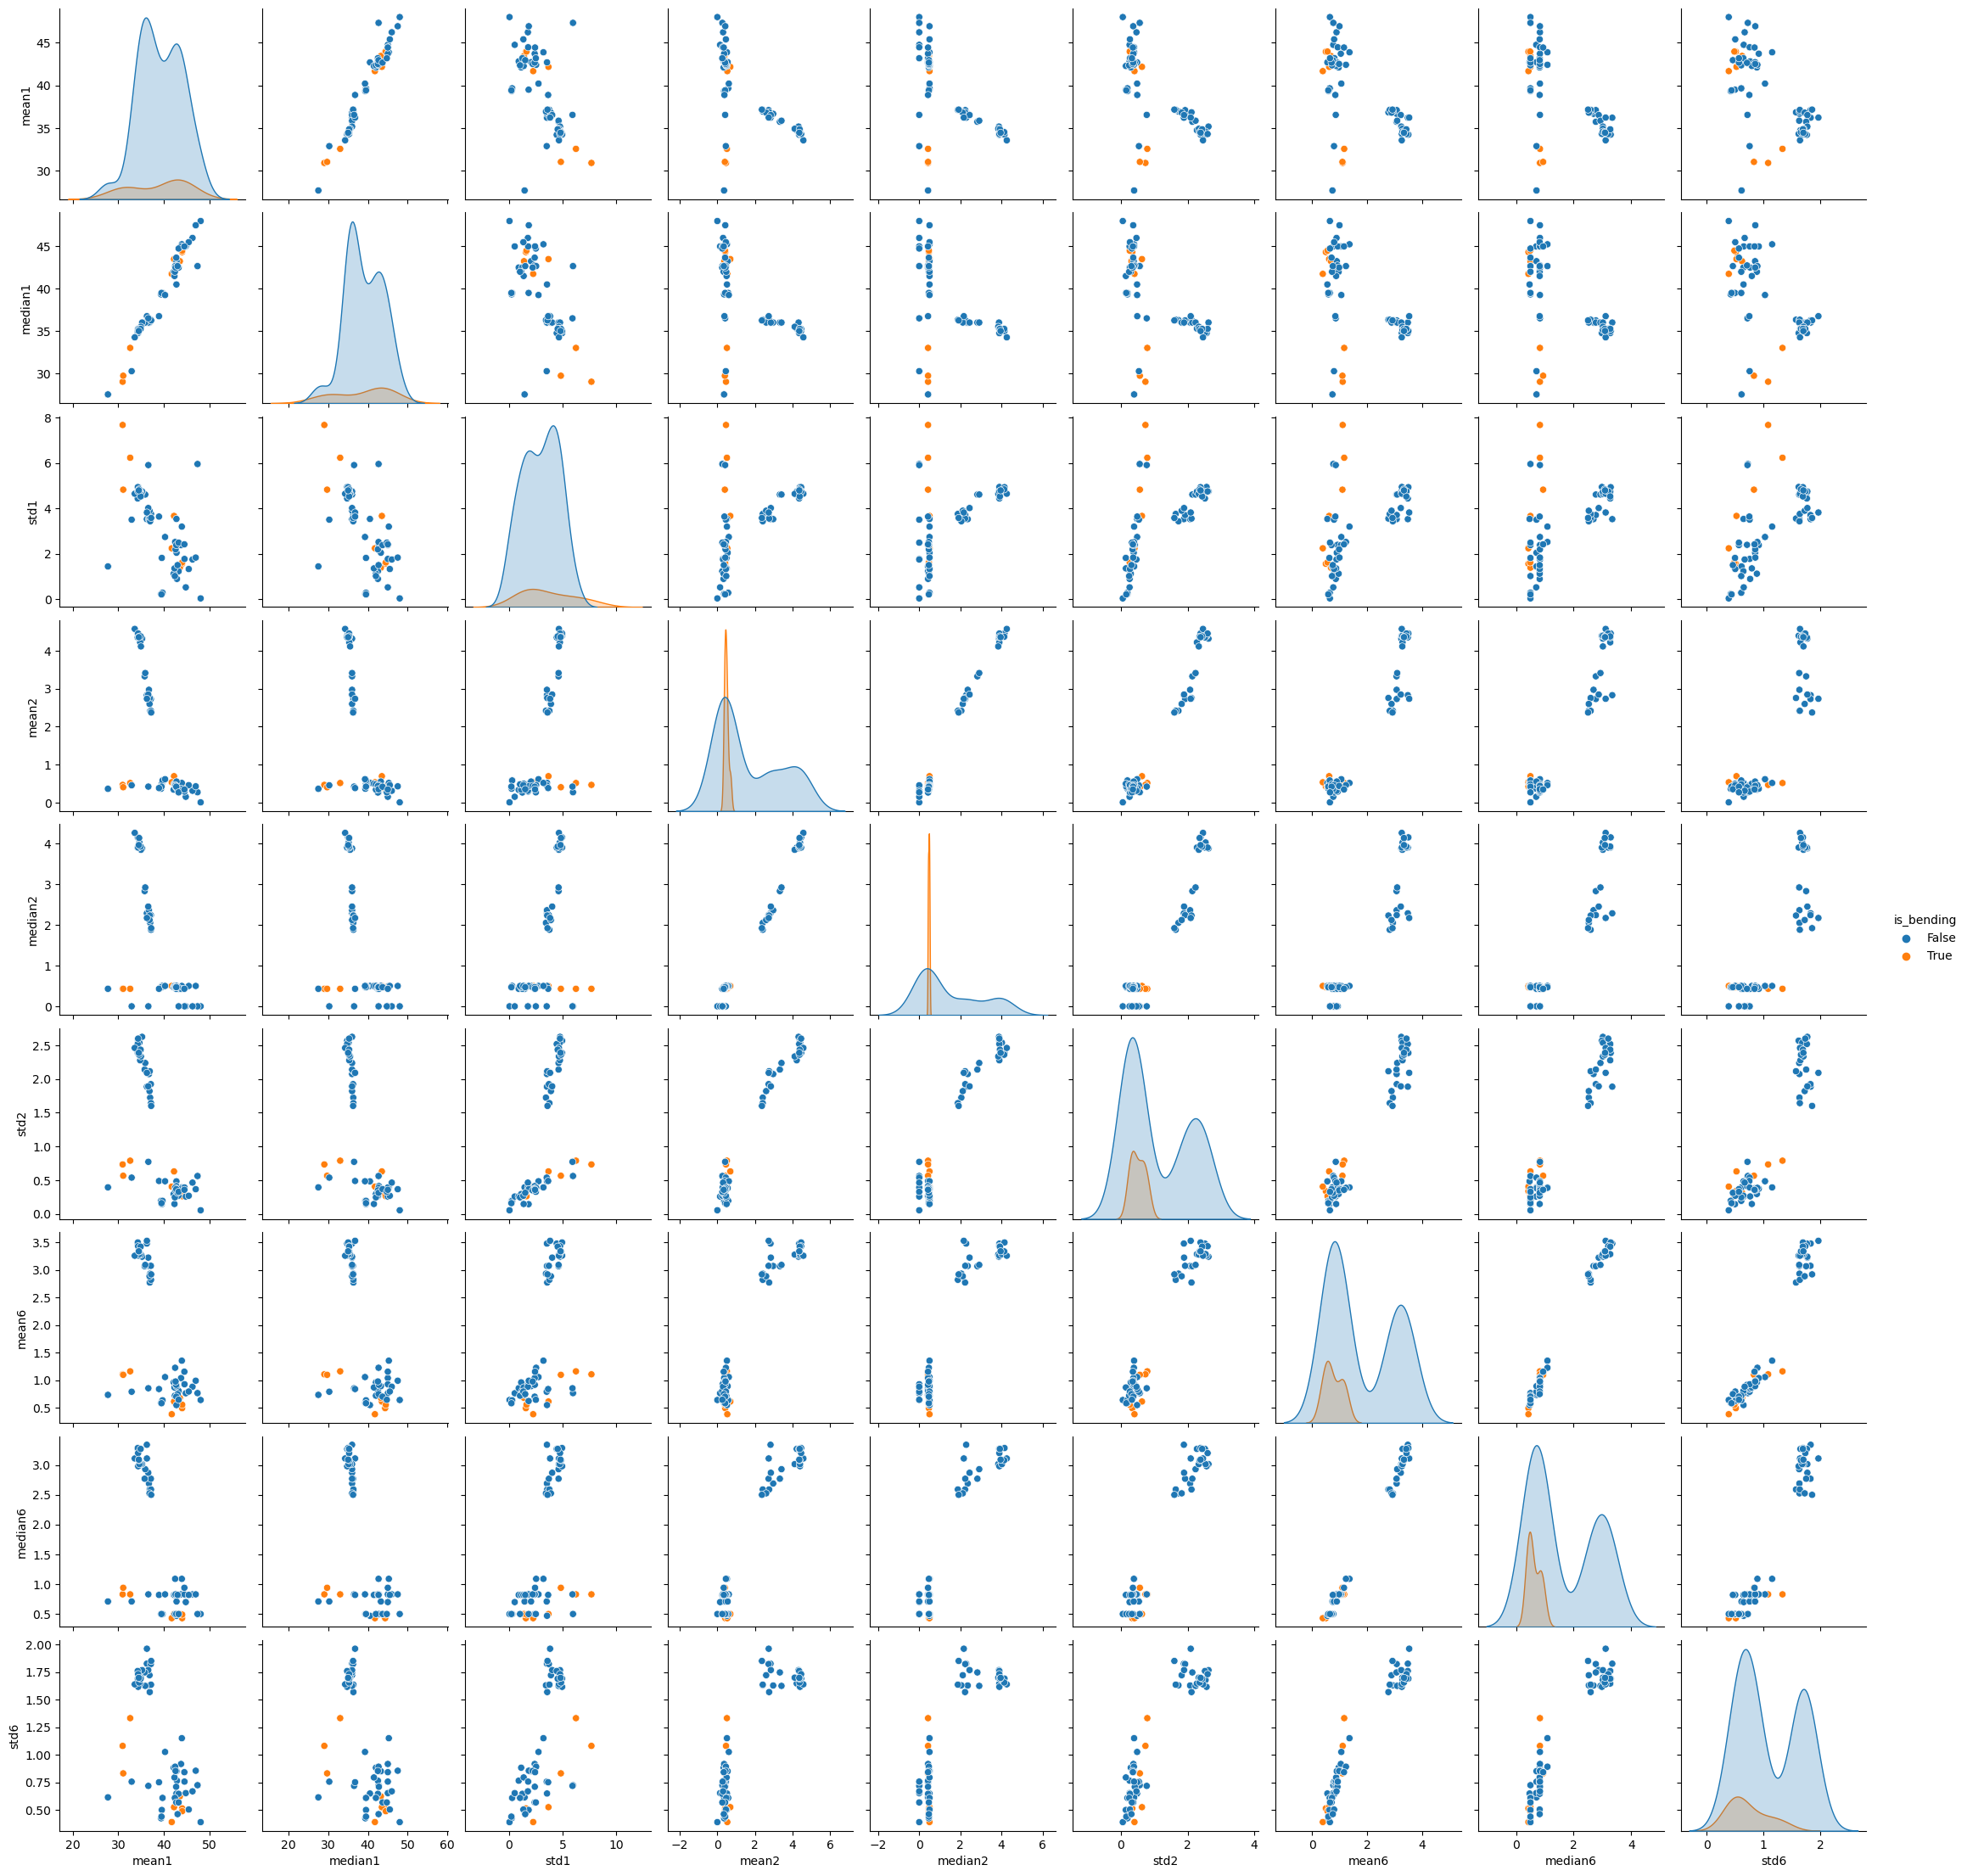

In [12]:
sns.pairplot(training_data, hue='is_bending')

#### ii. Splitted Plots

In [13]:
# Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

def split_and_double(df, number_of_halves):
    # Exclude 'time' column
    df = df.drop(columns=['time'])

    # Calculate the number of rows in each half
    rows_per_half = len(df) // number_of_halves

    # Initialize an empty DataFrame to store the result
    result = pd.DataFrame()

    # Loop through each half
    for i in range(number_of_halves):
        # Split the DataFrame into halves
        df_half = df.iloc[i * rows_per_half: (i + 1) * rows_per_half]
        
        # Double the number of columns and rename them
        df_half.columns = [f'{col}{i+1}' for col in df_half.columns]
        
        # Concatenate the DataFrame half to the result
        result = pd.concat([result, df_half.reset_index(drop=True)], axis=1)
    
    return result

In [14]:
# The scatterplot will be created using time series 1, 2, and 12
split_features_df = pd.DataFrame(columns=[  'instance',
                                            'mean1', 'median1', 'std1', 
                                            'mean2', 'median2', 'std2', 
                                            'mean12', 'median12', 'std12'   ])

instance_counter = 1
for df in full_df_list:
    # Split the DataFrame into two halves
    split_df = split_and_double(df, 2)

    # Column names
    """
    [   'avg_rss121', 'var_rss121', 'avg_rss131', 'var_rss131', 'avg_rss231', 'var_rss231', 
        'avg_rss122', 'var_rss122', 'avg_rss132', 'var_rss132', 'avg_rss232', 'var_rss232'  ]
    """

    describe_df = split_df.describe()

    instance_dict = {  'instance': instance_counter,
                                  
                        'mean1': describe_df['avg_rss121']['mean'], 'median1': describe_df['avg_rss121']['50%'], 'std1': describe_df['avg_rss121']['std'],

                        'mean2': describe_df['var_rss121']['mean'], 'median2': describe_df['var_rss121']['50%'], 'std2': describe_df['var_rss121']['std'], 

                        'mean12': describe_df['var_rss232']['mean'], 'median12': describe_df['var_rss232']['50%'], 'std12': describe_df['var_rss232']['std']    }

    split_features_df = pd.concat([split_features_df, pd.DataFrame([instance_dict])], ignore_index=True)

    instance_counter += 1

/var/folders/h1/r_7yspw94w77hrsrcwzwy75m0000gn/T/ipykernel_1678/2248842392.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  split_features_df = pd.concat([split_features_df, pd.DataFrame([instance_dict])], ignore_index=True)


In [15]:
split_features_df.shape

(88, 10)

In [16]:
split_features_df.set_index('instance', inplace=True)
split_features_df.head()

,mean1,median1,std1,mean2,median2,std2,mean12,median12,std12
instance,,,,,,,,,
1,40.946958,41.25,1.102963,0.375667,0.470,0.328089,0.552167,0.43,0.510494
2,42.643292,42.50,0.641849,0.355000,0.470,0.258298,0.533583,0.43,0.575061
3,44.057167,44.50,1.556971,0.381042,0.470,0.329540,0.388333,0.00,0.478528
4,43.278875,45.00,3.473355,0.673292,0.485,0.634285,0.586083,0.47,0.491873
5,41.621208,42.33,3.118644,0.623083,0.500,0.489595,0.347500,0.43,0.363144


In [17]:
split_bending_training_data = split_features_df.loc[bending_training_data_instances]
split_other_training_data = split_features_df.loc[other_training_data_instances]

In [18]:
split_bending_training_data['is_bending'] = True
split_other_training_data['is_bending'] = False

split_training_data = pd.concat([split_bending_training_data, split_other_training_data])

/Users/ebengunadi/anaconda3/envs/dsci552-hw4/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ebengunadi/anaconda3/envs/dsci552-hw4/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ebengunadi/anaconda3/envs/dsci552-hw4/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ebengunadi/anaconda3/envs/dsci552-hw4/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

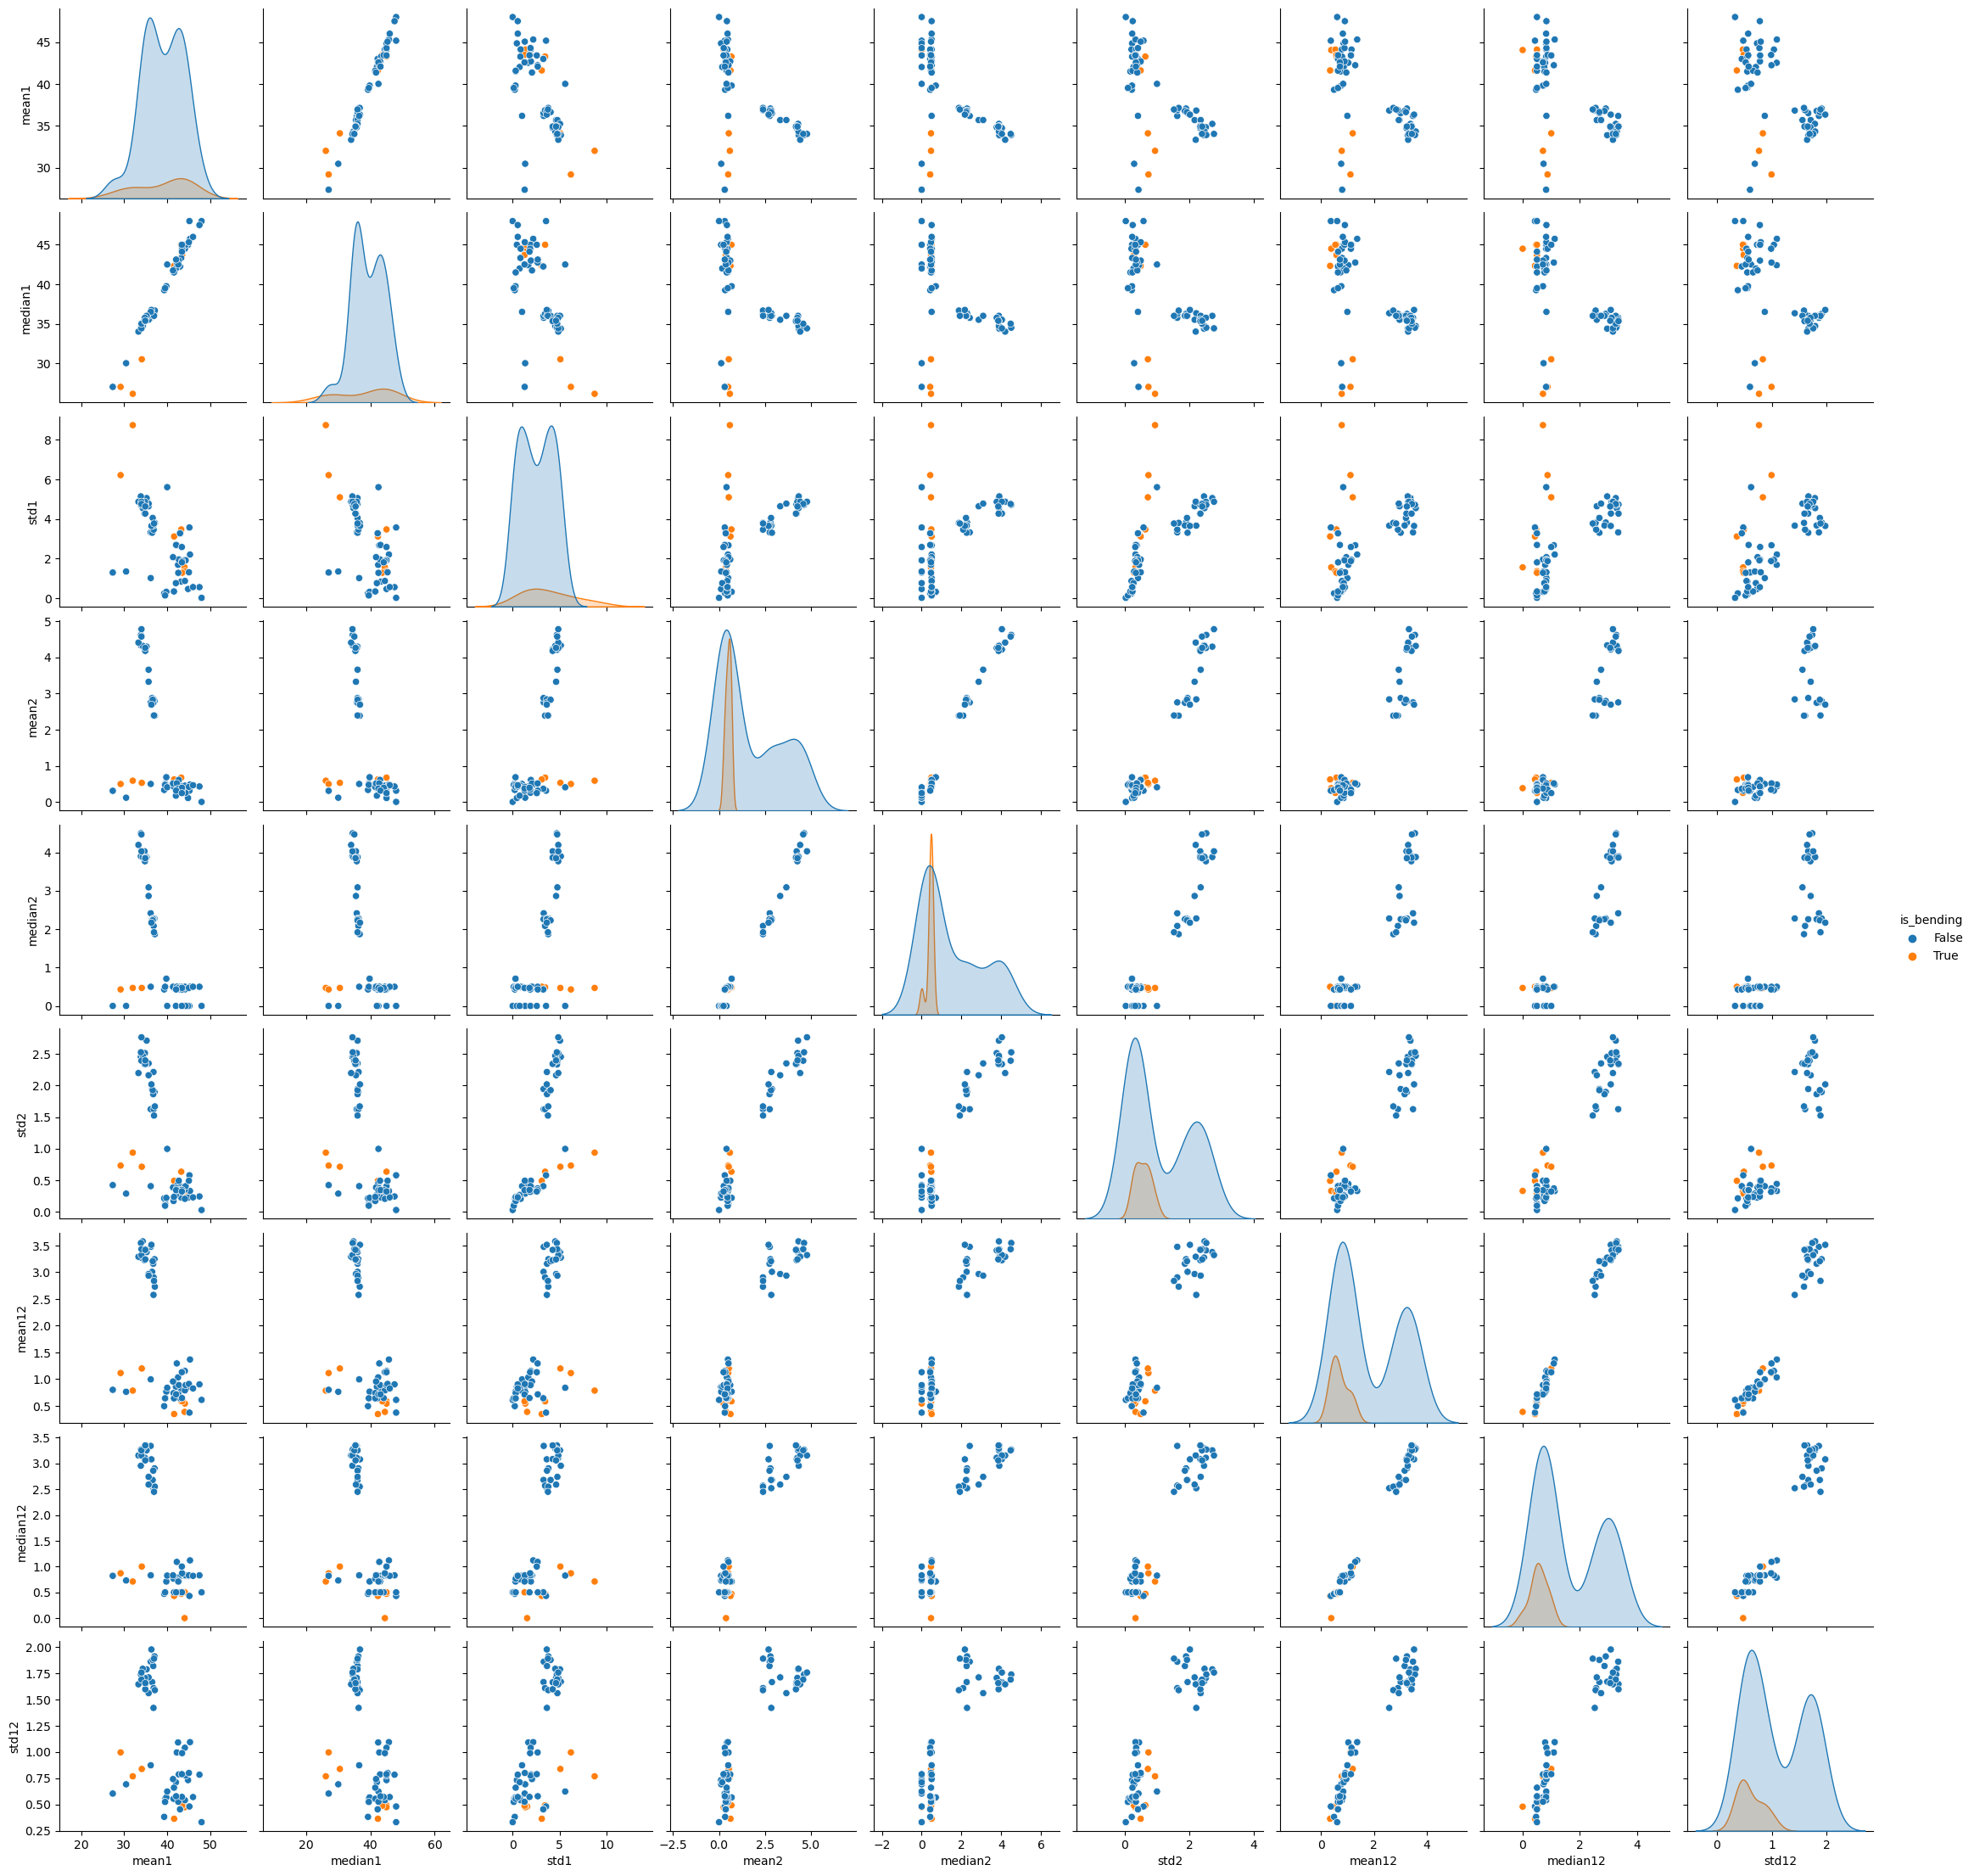

In [19]:
sns.pairplot(split_training_data, hue='is_bending')

There are no considerable differences in these pair plots compared with those of 2(a)i.

#### iii. Time Series Segments

In [20]:
# Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.

l_values = list(range(1, 21))

l_feature_df_list = []
for l in l_values:
    instance_df_list = []

    instance_counter = 1
    for df in full_df_list:
        split_df = split_and_double(df, l)

        number_of_features = len(split_df.columns)
        
        describe_df = split_df.describe()

        column_df_list = []       
        for column in describe_df.columns:

            column_dict = { f'mean_{column}': describe_df[f'{column}']['mean'],
                            f'median_{column}': describe_df[f'{column}']['50%'],
                            f'std_{column}': describe_df[f'{column}']['std']    }

            column_df = pd.DataFrame([column_dict])
            column_df_list.append(column_df)                               

        instance_df = pd.concat(column_df_list, axis=1) # horizontal concatenation
        instance_df['instance'] = instance_counter
        instance_df_list.append(instance_df)

        instance_counter += 1

    feature_df = pd.concat(instance_df_list, ignore_index=True) # vertical concatenation
    l_feature_df_list.append(feature_df)

/var/folders/h1/r_7yspw94w77hrsrcwzwy75m0000gn/T/ipykernel_1678/639260332.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  instance_df['instance'] = instance_counter
/var/folders/h1/r_7yspw94w77hrsrcwzwy75m0000gn/T/ipykernel_1678/639260332.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  instance_df['instance'] = instance_counter
/var/folders/h1/r_7yspw94w77hrsrcwzwy75m0000gn/T/ipykernel_1678/639260332.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

In [21]:
len(l_feature_df_list)


20

In [22]:
l_feature_df_list[5].shape 
# 6 time series x 3 selected time-domain features = 18 features
# 18 features, each broken into 6 time series = 108 features 
# 108 features + 1 instance column = 109 columns

(88, 109)

In [23]:
l_feature_df_list[5].head()

,mean_avg_rss121,median_avg_rss121,std_avg_rss121,mean_var_rss121,median_var_rss121,std_var_rss121,mean_avg_rss131,median_avg_rss131,std_avg_rss131,mean_var_rss131,...,mean_var_rss136,median_var_rss136,std_var_rss136,mean_avg_rss236,median_avg_rss236,std_avg_rss236,mean_var_rss236,median_var_rss236,std_var_rss236,instance
0,40.927250,41.5,0.941100,0.470125,0.50,0.215838,17.478125,17.000,4.389624,0.799000,...,0.622375,0.470,0.577818,30.983250,30.000,1.955958,0.345875,0.43,0.412187,1
1,43.418500,43.5,0.327345,0.557000,0.50,0.139868,19.750875,20.500,4.234071,1.140375,...,1.389375,0.905,1.345636,32.370000,32.375,1.529732,0.384750,0.43,0.422053,2
2,44.231125,44.5,1.031429,0.402875,0.50,0.268555,22.988625,24.000,1.825713,0.414875,...,0.322000,0.430,0.330869,36.018625,36.000,0.161047,0.099500,0.00,0.241797,3
3,43.946750,45.0,3.229635,0.519625,0.47,0.594043,23.029000,23.750,3.958475,0.743125,...,1.310000,0.765,1.374151,28.280250,28.500,2.890650,0.543125,0.47,0.457427,4
4,41.715000,42.0,2.242549,0.492125,0.50,0.353699,19.741875,23.125,5.997765,1.064750,...,0.634000,0.500,0.504116,27.938625,27.000,1.505894,0.299625,0.43,0.270023,5


In [24]:
# Prepare the training data

l_feature_training_data_list = []

for l_feature_df in l_feature_df_list:
    l_feature_df = l_feature_df.set_index('instance')

    l_feature_bending_training_data = l_feature_df.loc[bending_training_data_instances]
    l_feature_other_training_data = l_feature_df.loc[other_training_data_instances]

    l_feature_bending_training_data['is_bending'] = True
    l_feature_other_training_data['is_bending'] = False

    l_feature_training_data = pd.concat([l_feature_bending_training_data, l_feature_other_training_data])

    l_feature_training_data = l_feature_training_data.fillna(l_feature_training_data.mean()) # Impute missing values with mean

    l_feature_training_data_list.append(l_feature_training_data)

In [25]:
len(l_feature_training_data_list)

20

In [26]:
l_feature_training_data_list[5].head()

,mean_avg_rss121,median_avg_rss121,std_avg_rss121,mean_var_rss121,median_var_rss121,std_var_rss121,mean_avg_rss131,median_avg_rss131,std_avg_rss131,mean_var_rss131,...,mean_var_rss136,median_var_rss136,std_var_rss136,mean_avg_rss236,median_avg_rss236,std_avg_rss236,mean_var_rss236,median_var_rss236,std_var_rss236,is_bending
instance,,,,,,,,,,,,,,,,,,,,,
3,44.231125,44.5,1.031429,0.402875,0.50,0.268555,22.988625,24.000,1.825713,0.414875,...,0.322000,0.430,0.330869,36.018625,36.0,0.161047,0.099500,0.00,0.241797,True
4,43.946750,45.0,3.229635,0.519625,0.47,0.594043,23.029000,23.750,3.958475,0.743125,...,1.310000,0.765,1.374151,28.280250,28.5,2.890650,0.543125,0.47,0.457427,True
5,41.715000,42.0,2.242549,0.492125,0.50,0.353699,19.741875,23.125,5.997765,1.064750,...,0.634000,0.500,0.504116,27.938625,27.0,1.505894,0.299625,0.43,0.270023,True
6,44.923875,45.0,0.682991,0.115250,0.00,0.256130,17.761625,18.500,3.118332,1.041750,...,0.707625,0.470,0.795749,22.262125,23.5,2.952831,0.563875,0.47,0.681275,True
7,42.738625,42.5,0.894612,0.406625,0.47,0.297751,16.204250,15.330,4.612760,1.055000,...,0.788000,0.500,0.789872,21.762500,22.0,2.163210,0.607250,0.50,0.381944,True


In [27]:
def calculate_p_accuracies(l_feature_training_data):
    X_train = l_feature_training_data.drop(columns=['is_bending']).reset_index(drop=True)
    y_train = l_feature_training_data['is_bending'].reset_index(drop=True)

    # Normalize features to help improve the convergence of logistic regression
    X_train = pd.DataFrame(preprocessing.scale(X_train), columns=X_train.columns)

    results_df = pd.DataFrame(columns=['p', 'accuracy'])
    for p in range(1, len(X_train.columns) + 1):
        # Initialize a logistic regression model
        log_reg = LogisticRegression(random_state=42)

        # Initialize RFE with p features
        rfe = RFE(estimator=log_reg, n_features_to_select=p)

        # Fit RFE on the training data
        X_train_selected = rfe.fit_transform(X_train, y_train)

        # Perform 5-fold stratified cross-validation
        skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        accuracies = []
        for train_index, test_index in skfolds.split(X_train_selected, y_train):
            X_train_folds = X_train_selected[train_index]
            y_train_folds = y_train[train_index]
            X_test_fold = X_train_selected[test_index]
            y_test_fold = y_train[test_index]

            # Fit a clone of the model on the training folds
            clone_log_reg = clone(log_reg)
            clone_log_reg.fit(X_train_folds, y_train_folds)

            # Evaluate the model on the test fold
            y_pred = clone_log_reg.predict(X_test_fold)
            accuracy = accuracy_score(y_test_fold, y_pred)
            accuracies.append(accuracy)

        avg_accuracy = np.mean(accuracies)

        results_dict = {'p': p, 
                        'accuracy': avg_accuracy}
        
        results_df = pd.concat([results_df, pd.DataFrame([results_dict])], ignore_index=True)
       
    return(results_df)

The right way to perform cross-validation is to only use the training set, as can be seen above. Using the test set would introduce data leakage and compromise the model's quality.

> Note: If re-running this notebook, no need to run the commented out code below from scratch since they have been run with results outputted to the 'data/2_a_iii_accuracies' directory. Running the code from scratch takes around 1 hour to complete on a laptop. 

In [28]:
# l1_accuracies = calculate_p_accuracies(l_feature_training_data_list[0])

In [29]:
# l1_accuracies.to_csv('../data/2_a_iii_accuracies/l1_accuracies.csv', encoding='utf-8', index=False)

In [30]:
# l2_accuracies = calculate_p_accuracies(l_feature_training_data_list[1])

In [31]:
# l2_accuracies.to_csv('../data/2_a_iii_accuracies/l2_accuracies.csv', encoding='utf-8', index=False)

In [32]:
# l3_accuracies = calculate_p_accuracies(l_feature_training_data_list[2])

In [33]:
# l3_accuracies.to_csv('../data/2_a_iii_accuracies/l3_accuracies.csv', encoding='utf-8', index=False)

In [34]:
# l4_accuracies = calculate_p_accuracies(l_feature_training_data_list[3])

In [35]:
# l4_accuracies.to_csv('../data/2_a_iii_accuracies/l4_accuracies.csv', encoding='utf-8', index=False)

In [36]:
# l5_accuracies = calculate_p_accuracies(l_feature_training_data_list[4])

In [37]:
# l5_accuracies.to_csv('../data/2_a_iii_accuracies/l5_accuracies.csv', encoding='utf-8', index=False)

In [38]:
# l6_accuracies = calculate_p_accuracies(l_feature_training_data_list[5])

In [39]:
# l6_accuracies.to_csv('../data/2_a_iii_accuracies/l6_accuracies.csv', encoding='utf-8', index=False)

In [40]:
# l7_accuracies = calculate_p_accuracies(l_feature_training_data_list[6])

In [41]:
# l7_accuracies.to_csv('../data/2_a_iii_accuracies/l7_accuracies.csv', encoding='utf-8', index=False)

In [42]:
# l8_accuracies = calculate_p_accuracies(l_feature_training_data_list[7])

In [43]:
# l8_accuracies.to_csv('../data/2_a_iii_accuracies/l8_accuracies.csv', encoding='utf-8', index=False)

In [44]:
# l9_accuracies = calculate_p_accuracies(l_feature_training_data_list[8])

In [45]:
# l9_accuracies.to_csv('../data/2_a_iii_accuracies/l9_accuracies.csv', encoding='utf-8', index=False)

In [46]:
# l10_accuracies = calculate_p_accuracies(l_feature_training_data_list[9])

In [47]:
# l10_accuracies.to_csv('../data/2_a_iii_accuracies/l10_accuracies.csv', encoding='utf-8', index=False)

In [48]:
# l11_accuracies = calculate_p_accuracies(l_feature_training_data_list[10])

In [49]:
# l11_accuracies.to_csv('../data/2_a_iii_accuracies/l11_accuracies.csv', encoding='utf-8', index=False)

In [50]:
# l12_accuracies = calculate_p_accuracies(l_feature_training_data_list[11])

In [51]:
# l12_accuracies.to_csv('../data/2_a_iii_accuracies/l12_accuracies.csv', encoding='utf-8', index=False)

In [52]:
# l13_accuracies = calculate_p_accuracies(l_feature_training_data_list[12])

In [53]:
# l13_accuracies.to_csv('../data/2_a_iii_accuracies/l13_accuracies.csv', encoding='utf-8', index=False)

In [54]:
# l14_accuracies = calculate_p_accuracies(l_feature_training_data_list[13])

In [55]:
# l14_accuracies.to_csv('../data/2_a_iii_accuracies/l14_accuracies.csv', encoding='utf-8', index=False)

In [56]:
# l15_accuracies = calculate_p_accuracies(l_feature_training_data_list[14])

In [57]:
# l15_accuracies.to_csv('../data/2_a_iii_accuracies/l15_accuracies.csv', encoding='utf-8', index=False)

In [58]:
# l16_accuracies = calculate_p_accuracies(l_feature_training_data_list[15])

In [59]:
# l16_accuracies.to_csv('../data/2_a_iii_accuracies/l16_accuracies.csv', encoding='utf-8', index=False)

In [60]:
# l17_accuracies = calculate_p_accuracies(l_feature_training_data_list[16])

In [61]:
# l17_accuracies.to_csv('../data/2_a_iii_accuracies/l17_accuracies.csv', encoding='utf-8', index=False)

In [62]:
# l18_accuracies = calculate_p_accuracies(l_feature_training_data_list[17])

In [63]:
# l18_accuracies.to_csv('../data/2_a_iii_accuracies/l18_accuracies.csv', encoding='utf-8', index=False)

In [64]:
# l19_accuracies = calculate_p_accuracies(l_feature_training_data_list[18])

In [65]:
# l19_accuracies.to_csv('../data/2_a_iii_accuracies/l19_accuracies.csv', encoding='utf-8', index=False)

In [66]:
# l20_accuracies = calculate_p_accuracies(l_feature_training_data_list[19])

In [67]:
# l20_accuracies.to_csv('../data/2_a_iii_accuracies/l20_accuracies.csv', encoding='utf-8', index=False)

In [68]:
l1_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l1_accuracies.csv', delimiter=',', encoding='utf-8')
l2_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l2_accuracies.csv', delimiter=',', encoding='utf-8')
l3_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l3_accuracies.csv', delimiter=',', encoding='utf-8')
l4_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l4_accuracies.csv', delimiter=',', encoding='utf-8')
l5_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l5_accuracies.csv', delimiter=',', encoding='utf-8')
l6_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l6_accuracies.csv', delimiter=',', encoding='utf-8')
l7_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l7_accuracies.csv', delimiter=',', encoding='utf-8')
l8_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l8_accuracies.csv', delimiter=',', encoding='utf-8')
l9_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l9_accuracies.csv', delimiter=',', encoding='utf-8')
l10_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l10_accuracies.csv', delimiter=',', encoding='utf-8')
l11_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l11_accuracies.csv', delimiter=',', encoding='utf-8')
l12_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l12_accuracies.csv', delimiter=',', encoding='utf-8')
l13_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l13_accuracies.csv', delimiter=',', encoding='utf-8')
l14_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l14_accuracies.csv', delimiter=',', encoding='utf-8')
l15_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l15_accuracies.csv', delimiter=',', encoding='utf-8')
l16_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l16_accuracies.csv', delimiter=',', encoding='utf-8')
l17_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l17_accuracies.csv', delimiter=',', encoding='utf-8')
l18_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l18_accuracies.csv', delimiter=',', encoding='utf-8')
l19_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l19_accuracies.csv', delimiter=',', encoding='utf-8')
l20_accuracies_df = pd.read_csv('../data/2_a_iii_accuracies/l20_accuracies.csv', delimiter=',', encoding='utf-8')

In [69]:
l1_accuracies_df['l'] = 1
l2_accuracies_df['l'] = 2
l3_accuracies_df['l'] = 3
l4_accuracies_df['l'] = 4
l5_accuracies_df['l'] = 5
l6_accuracies_df['l'] = 6
l7_accuracies_df['l'] = 7
l8_accuracies_df['l'] = 8
l9_accuracies_df['l'] = 9
l10_accuracies_df['l'] = 10
l11_accuracies_df['l'] = 11
l12_accuracies_df['l'] = 12
l13_accuracies_df['l'] = 13
l14_accuracies_df['l'] = 14
l15_accuracies_df['l'] = 15
l16_accuracies_df['l'] = 16
l17_accuracies_df['l'] = 17
l18_accuracies_df['l'] = 18
l19_accuracies_df['l'] = 19
l20_accuracies_df['l'] = 20


In [70]:
accuracies_df = pd.concat([l1_accuracies_df, l2_accuracies_df, l3_accuracies_df, l4_accuracies_df, l5_accuracies_df, l6_accuracies_df, l7_accuracies_df, l8_accuracies_df, l9_accuracies_df, l10_accuracies_df, l11_accuracies_df, l12_accuracies_df, l13_accuracies_df, l14_accuracies_df, l15_accuracies_df, l16_accuracies_df, l17_accuracies_df, l18_accuracies_df, l19_accuracies_df, l20_accuracies_df]).reset_index(drop=True)

In [71]:
accuracies_df[accuracies_df['accuracy'] == accuracies_df['accuracy'].max()] \
    .sort_values(by=['p', 'l'])[['l', 'p', 'accuracy']] \
    .head(5) \
    .reset_index(drop=True)

,l,p,accuracy
0,15,5,0.985714
1,11,6,0.985714
2,14,6,0.985714
3,15,6,0.985714
4,3,7,0.985714


Although a number of `(l, p)` pairs achieved the highest accuracy score, `(15, 5)` is preferred since it has the lowest p value. A lower number of features generally increases a model's interpretability or explainability. 

#### iv. Confusion Matrix

In [73]:
# Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

preferred_l = 15
preferred_p = 5

preferred_training_df = l_feature_training_data_list[preferred_l - 1]

X_train = preferred_training_df.drop(columns=['is_bending']).reset_index(drop=True)
y_train = preferred_training_df['is_bending'].reset_index(drop=True)

# Normalize features to help improve the convergence of logistic regression
X_train = pd.DataFrame(preprocessing.scale(X_train), columns=X_train.columns)

# Initialize a logistic regression model
log_reg = LogisticRegression(random_state=42)

# Initialize RFE with p features
rfe = RFE(estimator=log_reg, n_features_to_select=preferred_p)

# Fit RFE on the training data
X_train_selected = rfe.fit_transform(X_train, y_train)

# Train the logistic regression model on the selected features
log_reg.fit(X_train_selected, y_train)

# Make predictions on the training data
y_train_pred = log_reg.predict(X_train_selected)

# Calculate the confusion matrix for the training data
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

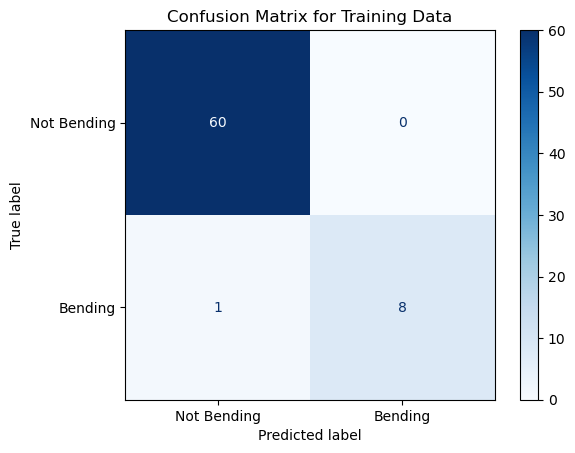

In [81]:
# Create a ConfusionMatrixDisplay from predictions
cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['Not Bending', 'Bending'], cmap='Blues')

# Plot the confusion matrix
plt.title('Confusion Matrix for Training Data')
plt.show()

In [85]:
# Calculate probabilities on the training set
y_train_prob = log_reg.predict_proba(X_train_selected)[:, 1]

# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

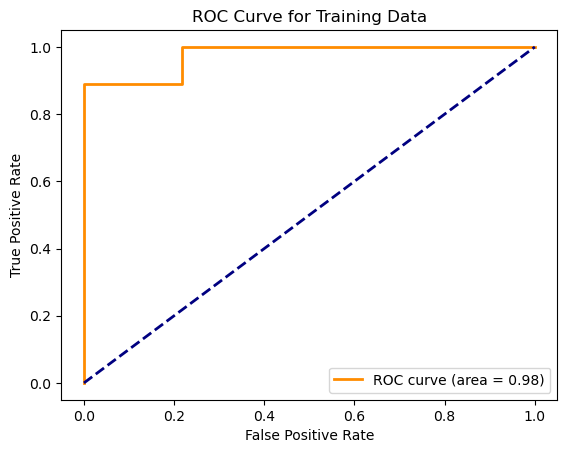

In [84]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right")
plt.show()

In [88]:
# Extract the coefficients and p-values using statsmodels
X_train_selected = sm.add_constant(X_train_selected)  # Add a constant term for the intercept
logit_model = sm.Logit(y_train, X_train_selected)
result = logit_model.fit()

# Print the coefficients (beta_i's) and p-values
print("Coefficients (beta_i's):")
print(result.params)
print("\nP-values:")
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.078955
         Iterations 10
Coefficients (beta_i's):
const   -4.010367
x1       4.969458
x2      -1.516759
x3       0.727698
x4       0.872612
x5      -1.110505
dtype: float64

P-values:
const    0.000449
x1       0.646441
x2       0.866470
x3       0.420626
x4       0.672500
x5       0.286181
dtype: float64


#### v. Test Classifier

In [90]:
# Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

# Prepare the test data
bending_test_data_instances = [
    # bending1
    1, 2,
    # bending2
    8, 9
]

other_test_data_instances = [
    # cycling
    14, 15, 16,
    # lying
    29, 30, 31,
    # sitting
    44, 45, 46,
    # standing
    59, 60, 61, 
    # walking
    74, 75, 76
]

l_feature_test_data_list = []

for l_feature_df in l_feature_df_list:
    l_feature_df = l_feature_df.set_index('instance')

    l_feature_bending_test_data = l_feature_df.loc[bending_test_data_instances]
    l_feature_other_test_data = l_feature_df.loc[other_test_data_instances]

    l_feature_bending_test_data['is_bending'] = True
    l_feature_other_test_data['is_bending'] = False

    l_feature_test_data = pd.concat([l_feature_bending_test_data, l_feature_other_test_data])

    l_feature_test_data = l_feature_test_data.fillna(l_feature_test_data.mean()) # Impute missing values with mean

    l_feature_test_data_list.append(l_feature_test_data)

In [92]:
preferred_test_df = l_feature_test_data_list[preferred_l - 1]

X_test = preferred_test_df.drop(columns=['is_bending']).reset_index(drop=True)
y_test = preferred_test_df['is_bending'].reset_index(drop=True)

# Normalize features to help improve the convergence of logistic regression
X_test = pd.DataFrame(preprocessing.scale(X_test), columns=X_test.columns)

# Preprocess the test data similar to the training data
X_test_selected = rfe.transform(X_test)

# Make predictions on the test set
y_test_pred = log_reg.predict(X_test_selected)

# Calculate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on the test set: {accuracy_test}')

Accuracy on the test set: 0.8947368421052632


As expected, the classifier's accuracy on the test set (0.894737) is lower compared with the cross-validation accuracy obtained previously (0.985714).

#### vi. Separation

#### vii. Imbalance

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

#### ii. Comparison

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

#### ii. Naive Bayes

#### ii. Comparison

## 3. ISLR 4.8.3

## 4. ISLR 4.8.7

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9

## References and Citations

- https://anaconda.org/silvertrix/bootstrapped
- https://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf (Chapters 3 & 4)
- https://stackoverflow.com/questions/36538780/merging-dataframes-on-index-with-pandas
- https://www.kaggle.com/code/alexisbcook/data-leakage